# La problematica de la empresa es saber si es factible invertir en la tecnología de fibra óptica para el mercado de internet fijo en Argentina

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
from geopy.geocoders import Nominatim
import contextily as ctx
import squarify
import warnings
warnings.filterwarnings('ignore')

# Se analiza la data de conectividad al servicio de internet

In [46]:
df= pd.read_excel("ConectividadalserviciodeInternet_2776151688780886140.xlsx")
df[['Provincia', 'Partido', 'Localidad','link']]=df[['Provincia', 'Partido', 'Localidad','link']].astype("category")


se crea una columna conectividad para realizar un analisis por zonas si exsite conectividad o no

In [47]:

df['Conectividad'] = df.apply(lambda row: 'SI' if 'SI' in row.values else 'NO', axis=1)
df.head()

,Provincia,Partido,Localidad,Poblacion,ADSL,CABLEMODEM,DIALUP,FIBRAOPTICA,SATELITAL,WIRELESS,TELEFONIAFIJA,3G,4G,link,Latitud,Longitud,Conectividad
0,BUENOS AIRES,Bahía Blanca,Villa Bordeau,0,NO,NO,NO,NO,NO,NO,NO,SI,SI,6056020,-38.647261,-62.320022,SI
1,BUENOS AIRES,Bahía Blanca,Villa Espora,0,NO,NO,NO,NO,NO,NO,NO,NO,NO,6056020,-38.776507,-62.185183,NO
2,BUENOS AIRES,Balcarce,Balcarce,38376,SI,SI,SI,SI,NO,SI,SI,SI,SI,6063010,-37.848278,-58.255167,SI
3,BUENOS AIRES,Balcarce,Los Pinos,337,NO,NO,NO,NO,NO,SI,SI,NO,NO,6063020,-37.941206,-58.322592,SI
4,BUENOS AIRES,Balcarce,Napaleofú,374,NO,NO,NO,SI,NO,SI,SI,SI,SI,6063030,-37.625498,-58.746186,SI


## Porcentaje de zonas con conectividad versus las zonas sin conectividad

In [48]:
conectividad_total = len(df)
porcentaje_si = round(len(df[df['Conectividad'] == 'SI']) / conectividad_total * 100,2)
porcentaje_no = round(len(df[df['Conectividad'] == 'NO']) / conectividad_total * 100,2)
print(f"El procentaje de zonas con conectividad es: {porcentaje_no}%")
print(f"El procentaje de zonas con conectividad es: {porcentaje_si}%")

El procentaje de zonas con conectividad es: 18.0%
El procentaje de zonas con conectividad es: 82.0%


se realiza la grafica de las zonas con conectividad y las que no tienen conectividad

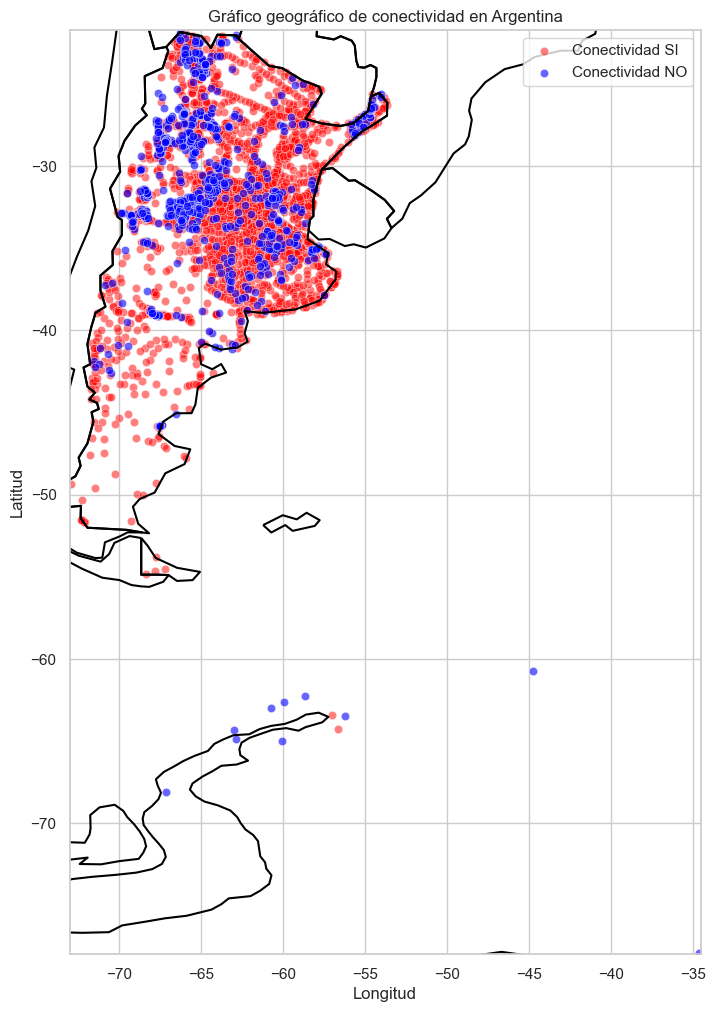

In [49]:
# se carga las coordenadas 
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("Argentina")
center_lat = location.latitude
center_lon = location.longitude

# cargar datos geográficos de Argentina
argentina = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

plt.figure(figsize=(20, 12))
df_si = df[df['Conectividad'] == 'SI']
df_no = df[df['Conectividad'] == 'NO']


sns.scatterplot(data=df_si, x='Longitud', y='Latitud', color='red', alpha=0.5)
sns.scatterplot(data=df_no, x='Longitud', y='Latitud', color='blue', alpha=0.6)

argentina.boundary.plot(ax=plt.gca(), color='black')

# configuracion del grafico
plt.title('Gráfico geográfico de conectividad en Argentina')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)

plt.legend(['Conectividad SI', 'Conectividad NO'])

buffer = 0.1  
plt.xlim(min(df['Longitud']) - buffer, max(df['Longitud']) + buffer)
plt.ylim(min(df['Latitud']) - buffer, max(df['Latitud']) + buffer)


plt.show()


se puede apreciar que la zona con mayor acceso a internet por diferentes tecnologias esta centrada en la parte del centro de argentina observando que hay un procentaje de un 18% que no cuenta con conectividad en su totalidad

## Se realiza un análisis de las zonas donde hay conectividad según la tecnologia que que existe

Analizando el procentaje por tipos de tecnologias la conectividad   

In [50]:
columnas_conectividad = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL', 'WIRELESS', 'TELEFONIAFIJA', '3G', '4G']

# contar los "si" y sumarlos
conteo_si = df[columnas_conectividad].apply(lambda col: col.value_counts().get('SI', 0)).sort_values(ascending=False)
suma_conteo_si = conteo_si.sum()

# procentaje de si
porcentaje_si = round((conteo_si / suma_conteo_si) * 100, 2)


data = {'Conteo_SI': conteo_si, 'Porcentaje_SI': porcentaje_si}
df_conteo_porcentaje_si = pd.DataFrame(data)

df_conteo_porcentaje_si


,Conteo_SI,Porcentaje_SI
4G,2574,18.66
WIRELESS,2242,16.25
TELEFONIAFIJA,2162,15.67
3G,1880,13.63
FIBRAOPTICA,1446,10.48
ADSL,1133,8.21
SATELITAL,1079,7.82
CABLEMODEM,876,6.35
DIALUP,403,2.92


Al realizar el análisis las tecnologias que tienen mayor conectividad son 4G, wireless, Telefonía fija, 3G como las que tienen mayor procentaje de conectividad.
El análisis se centrará en las tecnologias ADSL, satelital, cable modem, dial up en comparación a la tecnologia de fibra optica ya que la empresa requiere realizar una migración de tecnologia a fibra optica 

## Se realiza el gráfico para el analisis de las tecnologias anteriormente mencionadas para su analisis  

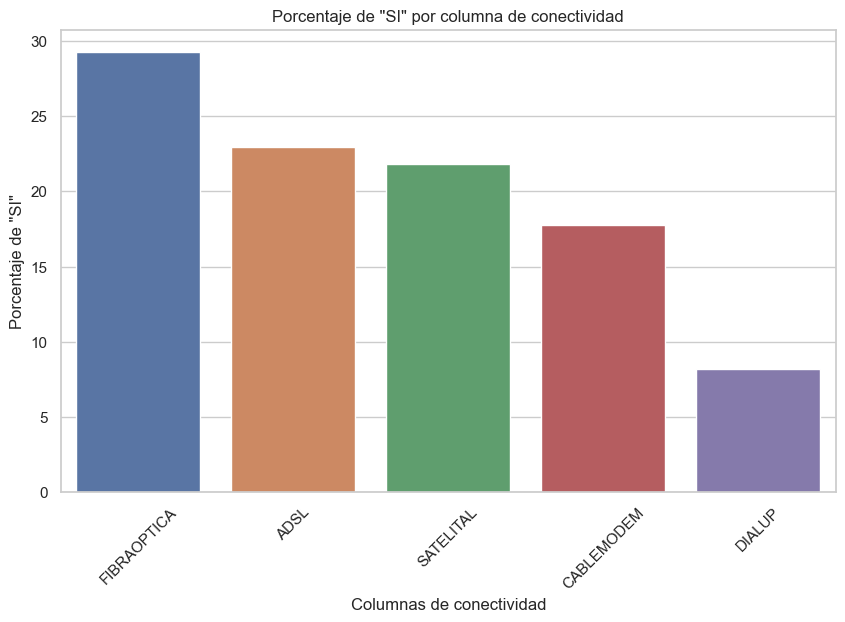

In [51]:
columnas_conectividad = ['ADSL', 'CABLEMODEM', 'DIALUP', 'FIBRAOPTICA', 'SATELITAL']
# contar y sumar los valores si
conteo_si = df[columnas_conectividad].apply(lambda col: col.value_counts().get('SI', 0)).sort_values(ascending=False)
suma_conteo_si = conteo_si.sum()

porcentaje_si = round((conteo_si / suma_conteo_si) * 100, 2)

data = {'Conteo_SI': conteo_si, 'Porcentaje_SI': porcentaje_si}
df_conteo_porcentaje_si = pd.DataFrame(data)

# creando el grafico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=df_conteo_porcentaje_si.index, y='Porcentaje_SI', data=df_conteo_porcentaje_si)

# configurar el grafico
plt.title('Porcentaje de "SI" por columna de conectividad')
plt.xlabel('Columnas de conectividad')
plt.ylabel('Porcentaje de "SI"')
plt.xticks(rotation=45)

plt.show()


se puede apreciar que las tecnologias desde ADSL, Satelital, cablemodem, Dialup suman en conjunto el 25.3% del total de conectividad es decir que es el 25.3% de un 82% del total de conectividad es un 20.7% del mercado nacional que tiene un acceso de internet fijo lento y es factible que migre a la tecnologia de fibra optica.
Adicional a este 20.7% del total del mercado se le suma un 18% que son zonas que no tienen conectividad, terminando con un mercado potencial de 38.7% del mercado de acceso a internet fijo con tecnologia de fibra óptica 

conociendo que el mercado es potencialmente amplio para la inversion se necesita saber cuales son las zonas donde se encuentra dichas tecnologias, si están esparcidas o focalizadas en una zona del país. Para ello se realiza un grafico que nos ubica los puntos de conectividad segun las tecnologias analizadas

In [52]:
df_tablas=df[['ADSL', 'CABLEMODEM','DIALUP', 'SATELITAL', 'FIBRAOPTICA','Latitud', 'Longitud']]

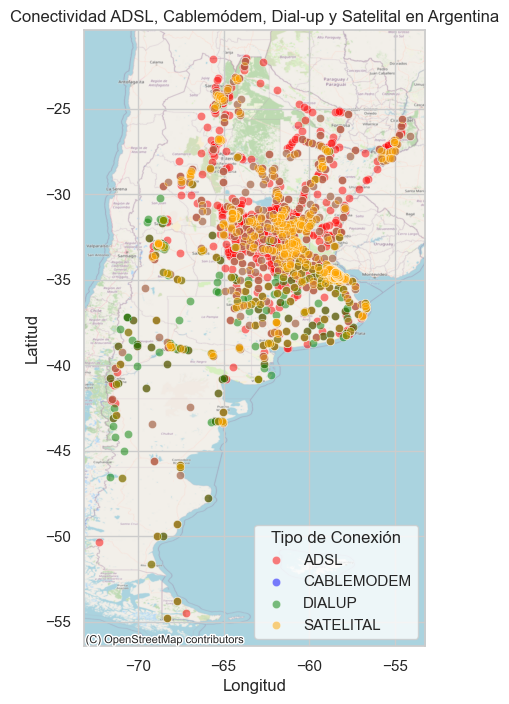

In [53]:
# se seleccionan las tecnologias ADSL, CABLEMODEM, DIALUP o SATELITAL si es "SI"
df_conexion_ADSL = df_tablas[(df_tablas['ADSL'] == 'SI')] 
df_conexion_cablemodem =df_tablas[(df_tablas['CABLEMODEM'] == 'SI')]  
df_conexion_dialup =df_tablas[(df_tablas['DIALUP'] == 'SI')]
df_conexion_satelital =df_tablas[(df_tablas['SATELITAL'] == 'SI')]

# Crear el gráfico 
plt.figure(figsize=(10, 8))
ax = plt.gca()


sns.scatterplot(x='Longitud', y='Latitud', data=df_conexion_ADSL, color='red', alpha=0.5, label='ADSL')
sns.scatterplot(x='Longitud', y='Latitud', data=df_conexion_cablemodem, color='blue', alpha=0.5, label='CABLEMODEM')
sns.scatterplot(x='Longitud', y='Latitud', data=df_conexion_dialup, color='green', alpha=0.5, label='DIALUP')
sns.scatterplot(x='Longitud', y='Latitud', data=df_conexion_cablemodem, color='orange', alpha=0.5, label='SATELITAL')


ctx.add_basemap(ax, crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# configurar grráfico
plt.title('Conectividad ADSL, Cablemódem, Dial-up y Satelital en Argentina')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend(title='Tipo de Conexión')

plt.show()




Las tecnologias estan focalizadas en su mayoria en la zona centro de argentina nos determina la mejor ubicación para iniciar inversion. 

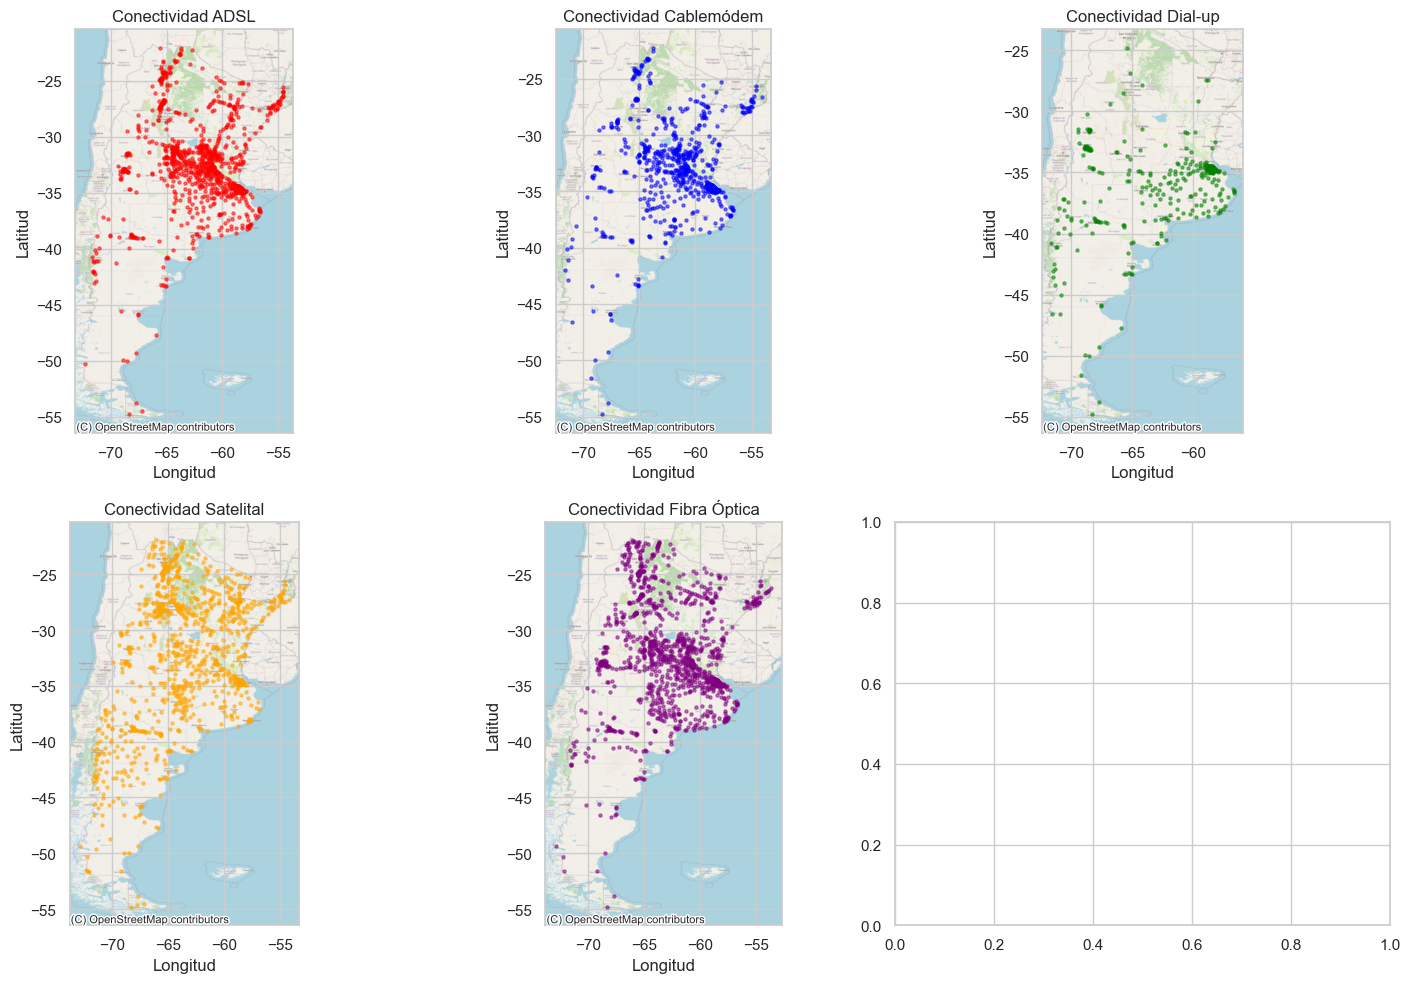

In [54]:
df_conexion_ADSL = df_tablas[(df_tablas['ADSL'] == 'SI')] 
df_conexion_cablemodem =df_tablas[(df_tablas['CABLEMODEM'] == 'SI')]  
df_conexion_dialup =df_tablas[(df_tablas['DIALUP'] == 'SI')]
df_conexion_satelital =df_tablas[(df_tablas['SATELITAL'] == 'SI')]
df_conexion_fibraoptica =df_tablas[(df_tablas['FIBRAOPTICA'] == 'SI')]

# Crear los subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# ADSL
axs[0, 0].scatter(df_conexion_ADSL['Longitud'], df_conexion_ADSL['Latitud'], color='red', alpha=0.5, s=5)
axs[0, 0].set_title('Conectividad ADSL')
axs[0, 0].set_xlabel('Longitud')
axs[0, 0].set_ylabel('Latitud')
ctx.add_basemap(axs[0, 0], crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# CABLEMODEM
axs[0, 1].scatter(df_conexion_cablemodem['Longitud'], df_conexion_cablemodem['Latitud'], color='blue', alpha=0.5, s=5)
axs[0, 1].set_title('Conectividad Cablemódem')
axs[0, 1].set_xlabel('Longitud')
axs[0, 1].set_ylabel('Latitud')
ctx.add_basemap(axs[0, 1], crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# DIALUP
axs[0, 2].scatter(df_conexion_dialup['Longitud'], df_conexion_dialup['Latitud'], color='green', alpha=0.5, s=5)
axs[0, 2].set_title('Conectividad Dial-up')
axs[0, 2].set_xlabel('Longitud')
axs[0, 2].set_ylabel('Latitud')
ctx.add_basemap(axs[0, 2], crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# SATELITAL
axs[1, 0].scatter(df_conexion_satelital['Longitud'], df_conexion_satelital['Latitud'], color='orange', alpha=0.5, s=5)
axs[1, 0].set_title('Conectividad Satelital')
axs[1, 0].set_xlabel('Longitud')
axs[1, 0].set_ylabel('Latitud')
ctx.add_basemap(axs[1, 0], crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

# FIBRAOPTICA
axs[1, 1].scatter(df_conexion_fibraoptica['Longitud'], df_conexion_fibraoptica['Latitud'], color='purple', alpha=0.5, s=5)
axs[1, 1].set_title('Conectividad Fibra Óptica')
axs[1, 1].set_xlabel('Longitud')
axs[1, 1].set_ylabel('Latitud')
ctx.add_basemap(axs[1, 1], crs='EPSG:4326', source=ctx.providers.OpenStreetMap.Mapnik)

plt.tight_layout()
plt.show()


las zonas en que nos centraremos el analisis son las tecnologias de ADSL, CABLEMODEM, DIALUP, SATELITAL por lo anteriormente detallado, además, se obserba que la mayor parte de las zonas de las tecnologias a analizar y se encuentran en en gran parte zonas que ya existe la tecnologia de Fibra óptica es decir que existe ya infraestructura para dicha tecnología y esto facilita los costos para la migración de tecnologías.

Para poder determinar si la fibra óptica será una tecnología que tenga aceptación y su fácil migración por el mercado potencial(el 38% aproximadamente del mercado nacional) se analizará el numero de acceso con un intervalo de velocidades es el mayor y tienen preferencia el mercado nacional

# Analizando  la distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada

A raiz del analisis se hace la pregunta ¿qué velocidades de descarga tienen mayor demanada?
para resolver esta pregunta se realiza el siguiente análisis  y asi determinar si la tecnología de fibra óptica es viable

In [55]:
df1=pd.read_excel("Distribución de los accesos totales nacionales a Internet fijo por velocidad de bajada (último trimestre disponible)modificado.xlsx")
df1["Trimestre"]=df1["Trimestre"].astype("category")
df1["Año"]=df1["Año"].astype("category")


se realiza un analisis de los accesos a internet por velocidad de descarga agrupados por año para distinguir la preferencia del consumo de la poblacion según la velocidad de descarga

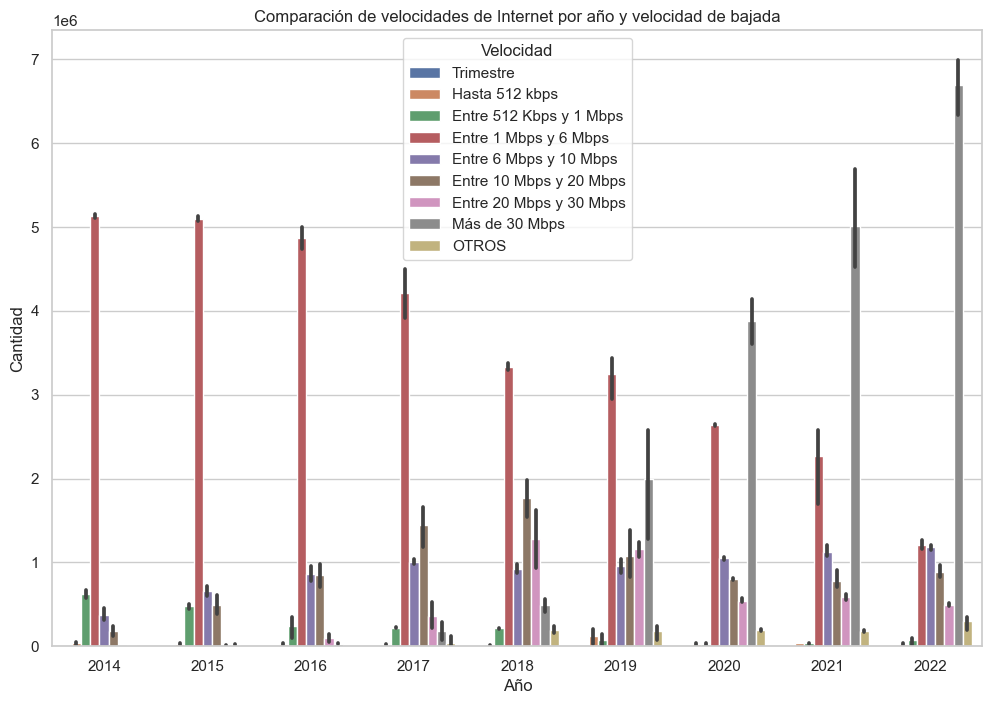

In [56]:
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Melt convierte las columnas de velocidades en una sola columna 'Velocidad' y los valores en una columna 'Cantidad'
df_melted = df1.melt(id_vars=['Año'], var_name='Velocidad', value_name='Cantidad')

# excluir la columna total
df_melted = df_melted[df_melted['Velocidad'] != 'Total']

# Crear el gráfico de barras agrupadas
sns.barplot(data=df_melted, x='Año', y='Cantidad', hue='Velocidad')


plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Comparación de velocidades de Internet por año y velocidad de bajada')

plt.show()

Se puede ver que en el año 2014 la tecnologia predomiante para la descarga es de 1 a 6 mbps con una pendiente negativa hasta el 2022.
En el año 2017 comienza el registro del rango de velocidad de mas de 30 mbps siendo el punto de quiebre siendo la velocidad con mayor demanda al tercer trimestre del año 2022 teniendo un incremento considerable

Para mejor visualizacion se realiza un analisis de las dos tecnologías con mayor impacto durante el periodo 2014 y 2022 

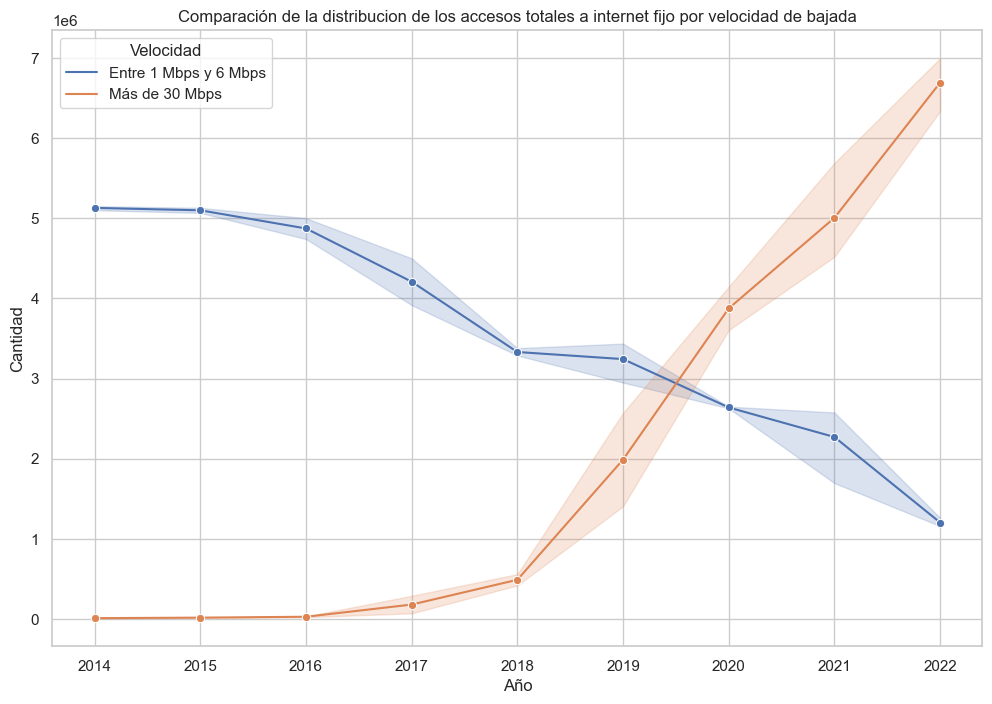

In [57]:
# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# se eliminan las columnas 'Total' y 'Trimestre'
df_filtered = df1.drop(['OTROS','Total', 'Trimestre','Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 6 Mbps y 10 Mbps',
       'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps'], axis=1)

# Melt se convienten las columnas de velocidades en una sola columna 'Velocidad' y los valores en una columna 'Cantidad'
df_melted = df_filtered.melt(id_vars=['Año'], var_name='Velocidad', value_name='Cantidad')

sns.lineplot(data=df_melted, x='Año', y='Cantidad', hue='Velocidad', marker='o')


plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Comparación de la distribucion de los accesos totales a internet fijo por velocidad de bajada')


plt.show()

Con esta grafica se puede confirmar que el consumo de tecnologías de acceso a internet con gran velocidad de descarga son las que tienen mayor demanda para el año 2022. 

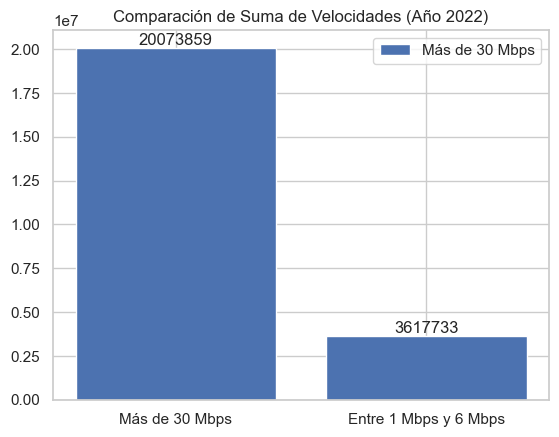

In [58]:
suma_mas_30 = df1[df1['Año'] == 2022]['Más de 30 Mbps'].sum()
suma_1_6_mbps = df1[df1['Año'] == 2022]['Entre 1 Mbps y 6 Mbps'].sum()

plt.bar(['Más de 30 Mbps', 'Entre 1 Mbps y 6 Mbps'], [suma_mas_30, suma_1_6_mbps])
plt.text(0, suma_mas_30, str(suma_mas_30), ha='center', va='bottom')
plt.text(1, suma_1_6_mbps, str(suma_1_6_mbps), ha='center', va='bottom')
plt.title('Comparación de Suma de Velocidades (Año 2022)')
plt.legend(['Más de 30 Mbps', 'Entre 1 Mbps y 6 Mbps'])
plt.show()


En esta grafica se puede apreciar con mayor claridad el incremento de manera sustancial para el acceso de internet fijo  con velocidades de mayores a 30 mbps siendo el de mayor consumo al año 2022 con 20073859 accesos durante dicho año, es por ello que la tecnologia de fibra óptica tiene velocidades de descarga que estan en el rango de la preferencia del consumo de velocidad de internet.
También cabe resaltar que las tecnologias que se estan analizando no se encuentran dentro del intervalo de esas velocidades en su mayoria es por ello que la migración de tecnologias seria mas factible.

Sabiendo que es muy factible por la preferencia a las altas velocidades de internet fijo se tiene que determinar cuales son las Provincias con mayor consumo para ubicar en donde centrar los esfuerzos en el inicio de la inversión  

# Analizando la tabla Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia


## Se quiere determinar cuales son las provincias con mayor acceso a internet para profundizar el analisis en ellas y focalizar la inversion en esas zonas. 

Se analiza la banda ancha donde se encuentran las tecnologías ADSL, CABLEMODEM, SATELITAL y la FIBRA OPTICA  versus  la banda angosta o DIALUP ( cabe resaltar que la fibra óptica es la tecnología que puede alcanzar la mayor velocidad llegando a 1 Gigabits por segundo con un coste de implementacion muy similar a la de fibra de cobre en la actualidad) y asi determinar que provincias son las que tienen mayor demanda de internet fijo

In [59]:
df3= pd.read_excel("Número de accesos al servicio de Internet fijo por banda ancha y banda angosta en cada provincia (trimestral).xlsx")
df3[['Año','Trimestre','Provincia']]=df3[['Año','Trimestre','Provincia']].astype("category")


Se realiza un gráfico para determinar que provincias tienen la mayor demanda de internet y centrar el analisis en dichas zonas.
Se analisa por separado la banda ancha y la banda angosta o DIALUP 

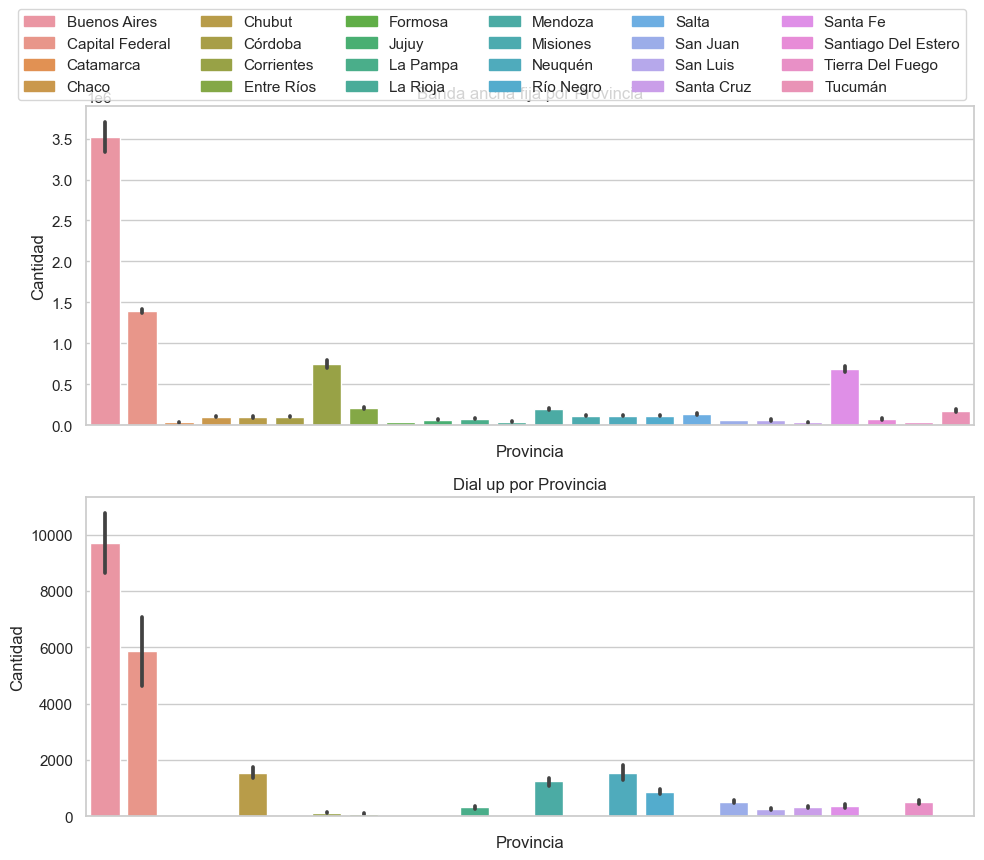

In [60]:
sns.set_theme(style="whitegrid")


fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Grafico por Banda ancha fija agrupado por Provincia
barplot1 = sns.barplot(x='Provincia', y='Banda ancha fija', data=df3, ax=axs[0])
axs[0].set_title('Banda ancha fija por Provincia')
axs[0].set_xlabel('Provincia') 
axs[0].set_ylabel('Cantidad')

# Dial up
barplot2 = sns.barplot(x='Provincia', y='Dial up', data=df3, ax=axs[1])
axs[1].set_title('Dial up por Provincia')
axs[1].set_xlabel('Provincia')
axs[1].set_ylabel('Cantidad')

# provincias unicas
province_names = df3['Provincia'].unique()

# configurar la leyenda
legend_handles = []
for i, province in enumerate(province_names):
    color = barplot1.get_children()[i].get_facecolor()
    legend_handles.append(plt.Rectangle((0, 0), 1, 1, color=color))

fig.legend(legend_handles, province_names, loc='lower center', bbox_to_anchor=(0.5, 0.95), ncol=6)

# borrar las nombres de las provincias en el eje x
axs[0].set_xticklabels([])
axs[1].set_xticklabels([])

plt.tight_layout()

plt.show()


el grafico superior se esta vizualizando el analisis de los accesos a internet por porvincia de banda ancha y en el gráfico interior el análisis de los accesos a internet por provincia de banda angosta o DIALUP teniendo encuenta que en la provincia de Buenos Aires y Capital Federal son las provincias donde se realizan mayor uso de internet de banda ancha fija asi como la de banda angosta  (la banda acha esta en un rango de millones y de la tecnologia dial up Teniendo un rango de miles)

para mejor vizualizacion de la comparación del numero de accesos a internet por año se realiza la grafica siguiente

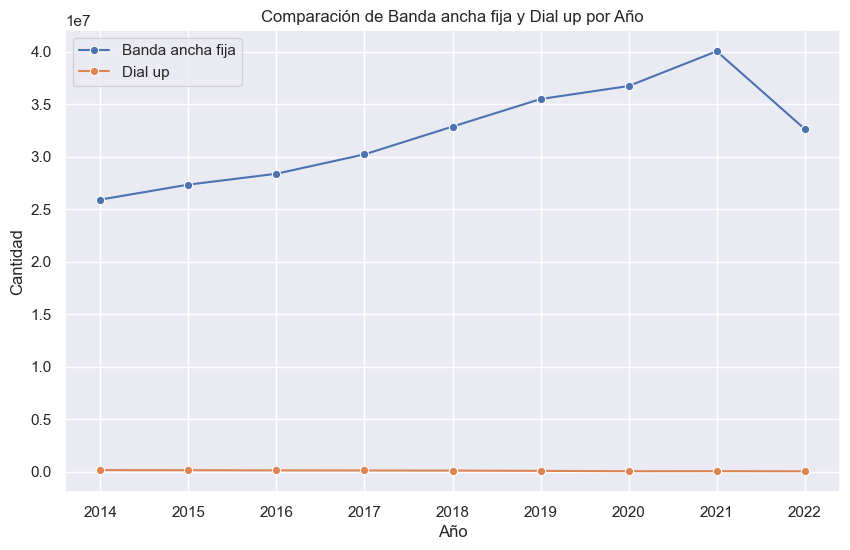

In [61]:
sns.set_theme(style="darkgrid")


grouped_data = df3.groupby('Año').sum().reset_index()

plt.figure(figsize=(10, 6))

# Banda ancha fija
sns.lineplot(x='Año', y='Banda ancha fija', data=grouped_data, marker='o', label='Banda ancha fija')

# Dial up
sns.lineplot(x='Año', y='Dial up', data=grouped_data, marker='o', label='Dial up')

plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Comparación de Banda ancha fija y Dial up por Año')

plt.legend()
plt.show()



Se observa una gran diferencia entre el numero de acceso a la banda ancha y la preferencia a altas velocidades en el servicio de internet fijo siendo el consumo casi en totalidad la demanda en internet.
Esto conlleva a la pregunta en que trimestre de año es el mejor para iniciar la implementación del proyecto y si las zonas varian por tirmestre 

se quiere determinar en que trimestre del año es el mas factible para la implementación del proyecto, adicional a ello de quiere determinar las provincias con un consumo mayor a 500000 accesos a internet, se analizarán las dos bandas

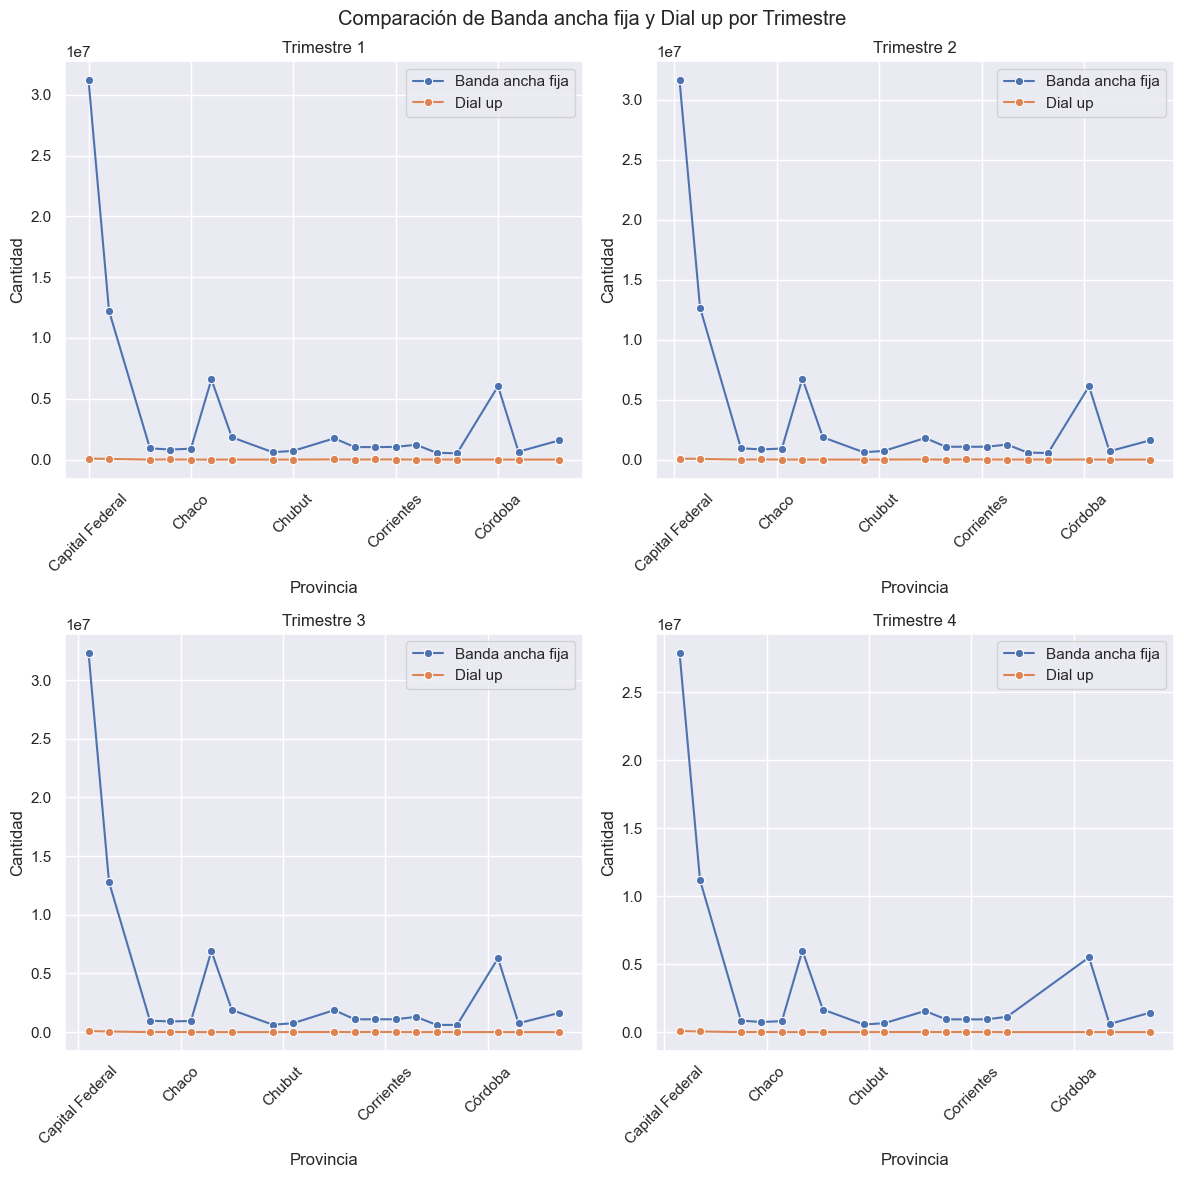

In [62]:
sns.set_theme(style="darkgrid")

# agruparlos y sumarlos
grouped_data = df3.groupby(['Provincia', 'Trimestre']).sum().reset_index()

# Provincias con Banda Ancha mayores a 500000
filtered_data = grouped_data[(grouped_data['Banda ancha fija'] > 500000) | (grouped_data['Provincia'] == 'Buenos Aires')]

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# se itera pro trimestre
for i, ax in enumerate(axs.flat):
    trimester_data = filtered_data[filtered_data['Trimestre'] == i+1]
    sns.lineplot(x=trimester_data.index, y='Banda ancha fija', data=trimester_data, marker='o', ax=ax, label='Banda ancha fija')
    sns.lineplot(x=trimester_data.index, y='Dial up', data=trimester_data, marker='o', ax=ax, label='Dial up')
    ax.set_xticklabels(trimester_data['Provincia'], rotation=45)
    ax.set_title(f'Trimestre {i+1}')
    ax.set_xlabel('Provincia')
    ax.set_ylabel('Cantidad')

fig.suptitle('Comparación de Banda ancha fija y Dial up por Trimestre')

plt.tight_layout()

plt.show()


se realiza unas gráficas agrupadas por trimetre para identificar el distrito con mayor numero de acceso a las distintas bandas de internet fijo se observa que los Provincias de Buenos Aires seguido por Capital Federal se consentra la mayor parte de accesos a internet.
Para el análisis para determinar cual de los trimestres es el mas indicado para el inicio del proyecto se observa que las graficas son muy constantes sin variación considerable entre ellas el consumo durante el año es constante y no tiene mucha variación por lo que siguiendo este análisis puede iniciar en cualquier trimestre del año.

Sabiendo que las provincias Buenos Aires, Capital Federal, Córdoba, Santa Fe son las que tienen la mayor demanda de consumo de internet, se realiza un análisis que tan saturado está el mercado en esas provincias para determinar cual provincia es la mas adecuada para el inicio del proyecto

# Analizando la tabla Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia

Para determinar que provincias tienen saturacion de servicios de internet fijo y hacer un analisis de las provincias con el mayor consumo de internet se realiza el analisis siguiente

In [63]:
df4=pd.read_excel("Número de accesos al servicio de Internet fijo por cada 100 hogares por provincia.xlsx")



se analiza los procentajes minimos y maximos en la tabla

In [64]:
df_filtro_2022 = df4[df4['Año'] == 2022]
min_value = df_filtro_2022['Accesos por cada 100 hogares'].min()
max_value = df_filtro_2022['Accesos por cada 100 hogares'].max()

print("Valor mínimo:", min_value)
print("Valor máximo:", max_value)


Valor mínimo: 34.96
Valor máximo: 122.28


se observa que por un lado en que el año 2022 tenemos un minimo de 34.9% accesos de internet fijo es decir que por cada 100 personas existen aproximadamente 35 accesos de internet fijo teniendo un 65% de personas que son potenciales clientes. 
Y por el otro lado como un maximo de 122.28% de accesos de internet fijo es decir que por cada 100 personas existen aproxiamdamente 122 accesos de internet fijo teniendo un sobresaturamiento en los accesos.

Para determinar la mejor provincia para iniciar el proyecto se realiza el filtro de las provincias que tienen la mayor cantidad de numero de accesos a internet para ello se tomará el año 2022 que es el ultimo año que se registra los datos para situarnos en un contexto contemporáneo y lo comparamos con el procentaje de accesos por cada 100 personas. 
Con ello obtendremos las provincias con mayor consumo y su saturación de accesos a internet


In [65]:
provincias_filtradas = ['Buenos Aires', 'Capital Federal', 'Córdoba', 'Santa Fe']
df_provincias_filtradas = df_filtro_2022[df_filtro_2022['Provincia'].isin(provincias_filtradas)]

df_mediana = df_provincias_filtradas.groupby('Provincia')['Accesos por cada 100 hogares'].median().reset_index()

df_mediana


,Provincia,Accesos por cada 100 hogares
0,Buenos Aires,77.58
1,Capital Federal,121.31
2,Córdoba,87.48
3,Santa Fe,77.90


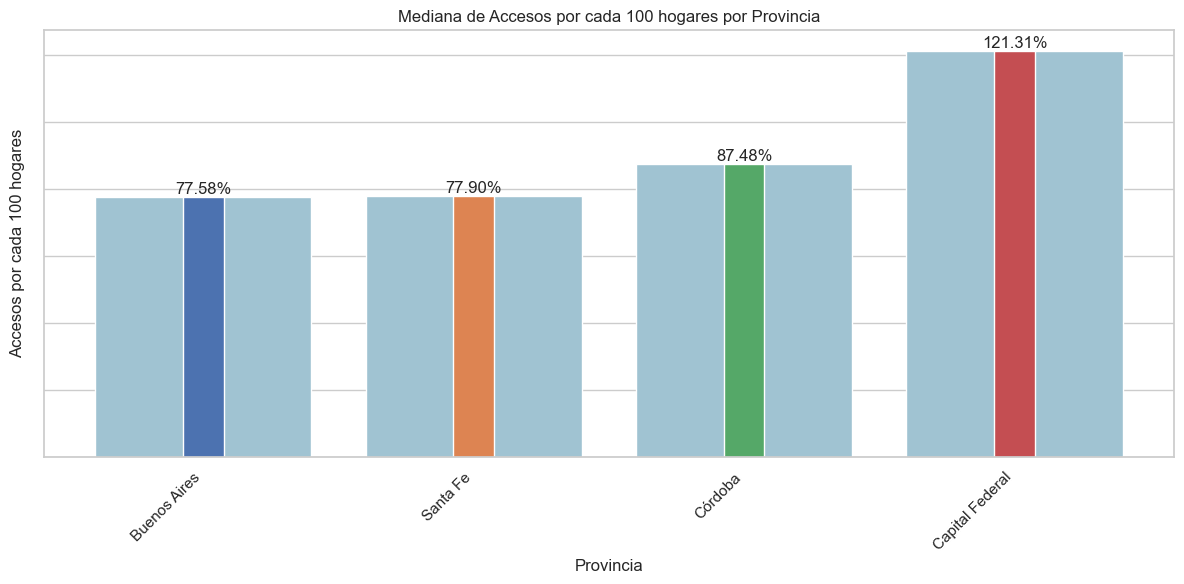

In [66]:
df_mediana = df_mediana.sort_values('Accesos por cada 100 hogares')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 6))

# Graficar la mediana de accesos por cada 100 hogares
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=df_mediana, color='skyblue', saturation=0.5)

bar_width = 0.6 / len(df_mediana)
for i, (_, row) in enumerate(df_mediana.iterrows()):
    plt.bar(i, row['Accesos por cada 100 hogares'], width=bar_width)

# Configuración del gráfico
plt.title('Mediana de Accesos por cada 100 hogares por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.xticks(rotation=45, ha='right')

plt.gca().yaxis.set_major_formatter(plt.NullFormatter())

# Agregar la leyenda con los valores de accesos por cada 100 hogares
for i, (_, row) in enumerate(df_mediana.iterrows()):
    plt.text(i, row['Accesos por cada 100 hogares'], f"{row['Accesos por cada 100 hogares']:.2f}%", 
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


Se puede apreciar que la provincia de Capital Federal (ocupa el segundo lugar en el numero de accesos a internet por banda acnha) tiene un porcentaje de 121.31% es decir tiene una sobre saturación de accesos a internet por persona.
mientras la provincia de Buenos Aires (ocupa el primer lugar en el número de accesos a internet por banda ancha) tiene un porcentaje de 77.58% es decir tiene subsaturación de accesos a internet por persona.
Con el analisis realizado se puede determinar que la provincia que posee las mejores condiciones para el inicio del proyecto es Buenos Aires ya que tiene la menor saturacion de accesos de internet, tiene la mas alta demanda de consumo de internet fijo de alta velocidad y que aun tiene un margen de crecimiento de  22.42%

Teniendo ya claro el panorama de cual es el mercado potencial ,la velocidad de mayor consumo preferente, las provincias que tienen el mayor consumo de internet fijo y la saturacion del mercado por provincia y con ello determinando que la mejor provincia para iniciar el proyecto es Buenos Aires.

Tenemos que determinar cual es la tecnologia predominante con la que nos vamos a competir para poder posicionarnos en ese mercado potencial. 

# Analizando la tabla Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría

Analizaremos en general del numero de accesos a internet y luego se enfocará en las provincias anteriormente mencionadas

In [67]:
df5= pd.read_excel("Número de accesos al servicio de Internet fijo por tecnología en cada localidad declarada Categoría.xlsx")
df5[['Provincia', 'Partido', 'Localidad']]=df5[['Provincia', 'Partido', 'Localidad']].astype("category")
df5.head()


,Provincia,Partido,Localidad,Link Indec,ADSL,CABLEMODEM,DIAL UP,FIBRA OPTICA,OTROS,SATELITAL,WIMAX,WIRELESS,Total general
0,BUENOS AIRES,25 de Mayo,25 de Mayo,6854100,873,4704,0,2,0,975,0,664,7218
1,BUENOS AIRES,25 de Mayo,Del Valle,6854020,181,0,0,0,10,1,0,0,192
2,BUENOS AIRES,25 de Mayo,Gobernador Ugarte,6854040,0,0,0,0,0,0,0,181,181
3,BUENOS AIRES,25 de Mayo,Norberto de la Riestra,6854060,0,782,0,6,167,0,0,327,1282
4,BUENOS AIRES,25 de Mayo,Lucas Monteverde,6854050,0,0,0,0,0,0,0,6,6


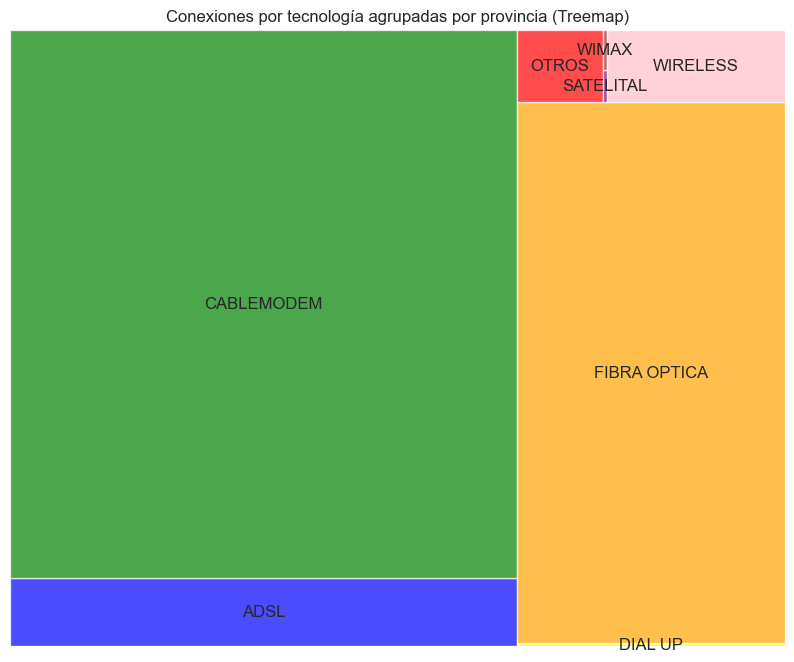

In [68]:

agrupado_por_provincia = df5.groupby('Provincia')[['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']].sum()
tecnologias = agrupado_por_provincia.columns.tolist()

colores = ['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'brown', 'pink']

# Creando el grafico Treemap
valores = [agrupado_por_provincia[tecnologia].values[0] for tecnologia in tecnologias]


plt.figure(figsize=(10, 8))
squarify.plot(sizes=valores, label=tecnologias, color=colores, alpha=0.7)


plt.title('Conexiones por tecnología agrupadas por provincia (Treemap)')
plt.axis('off')


plt.show()



con esta grafica se evidencia que la gran cantidad de conexiones a internet fijo se realiza mediante Cable Modem y en segundo lugar en fibra optica, entonces se realiza la pregunta dentro de las provincias con mayor accesos a internet que se selecionó anteriormente cual es la comparacion de conectividad entre fibra optica y las demás tecnologias de internet fijo

y para responder esa pregunta se realiza un analisis comparativo geografico de fibra optica y las demas tecnologias por conectividad

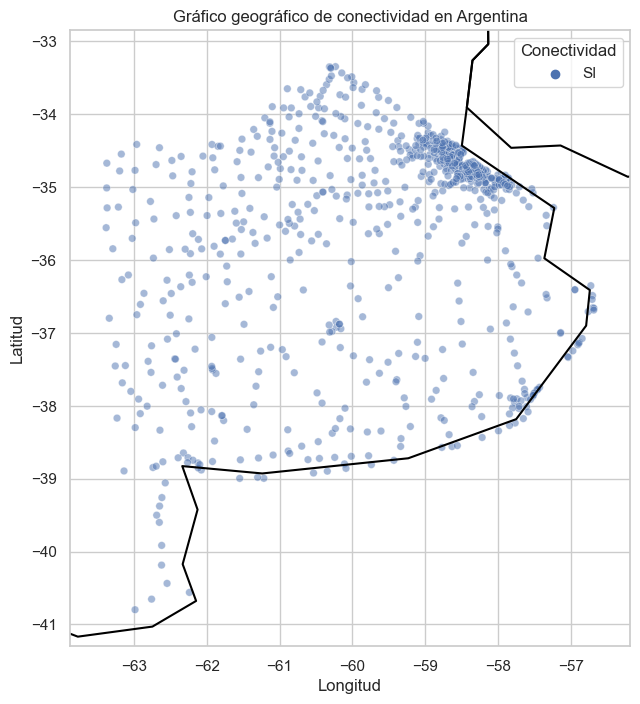

In [69]:
# Cargar los datos geográficos de Argentina
argentina = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Provincias de interés
provincias_interes = ["BUENOS AIRES"]
df_filtered = df[(df['Provincia'].str.strip().isin(provincias_interes)) & (df['Conectividad'] == 'SI')]

# Coordenadas
geolocator = Nominatim(user_agent="my_app")
location = geolocator.geocode("Argentina")
center_lat = location.latitude
center_lon = location.longitude

plt.figure(figsize=(12, 8))

# Crear el gráfico
sns.scatterplot(data=df_filtered, x='Longitud', y='Latitud', hue='Conectividad', s=30, alpha=0.5)

argentina.boundary.plot(ax=plt.gca(), color='black')

# Configuración del gráfico
plt.title('Gráfico geográfico de conectividad en Argentina')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.grid(True)
plt.legend(title='Conectividad')

buffer = 0.5
plt.xlim(min(df_filtered['Longitud']) - buffer, max(df_filtered['Longitud']) + buffer)
plt.ylim(min(df_filtered['Latitud']) - buffer, max(df_filtered['Latitud']) + buffer)

plt.show()

en primer lugar se realiza el analisis de las provincias selecionadas y su cenectividad, se puede apreciar que la mayor parte de ellas se concentran en una zona en especifico 

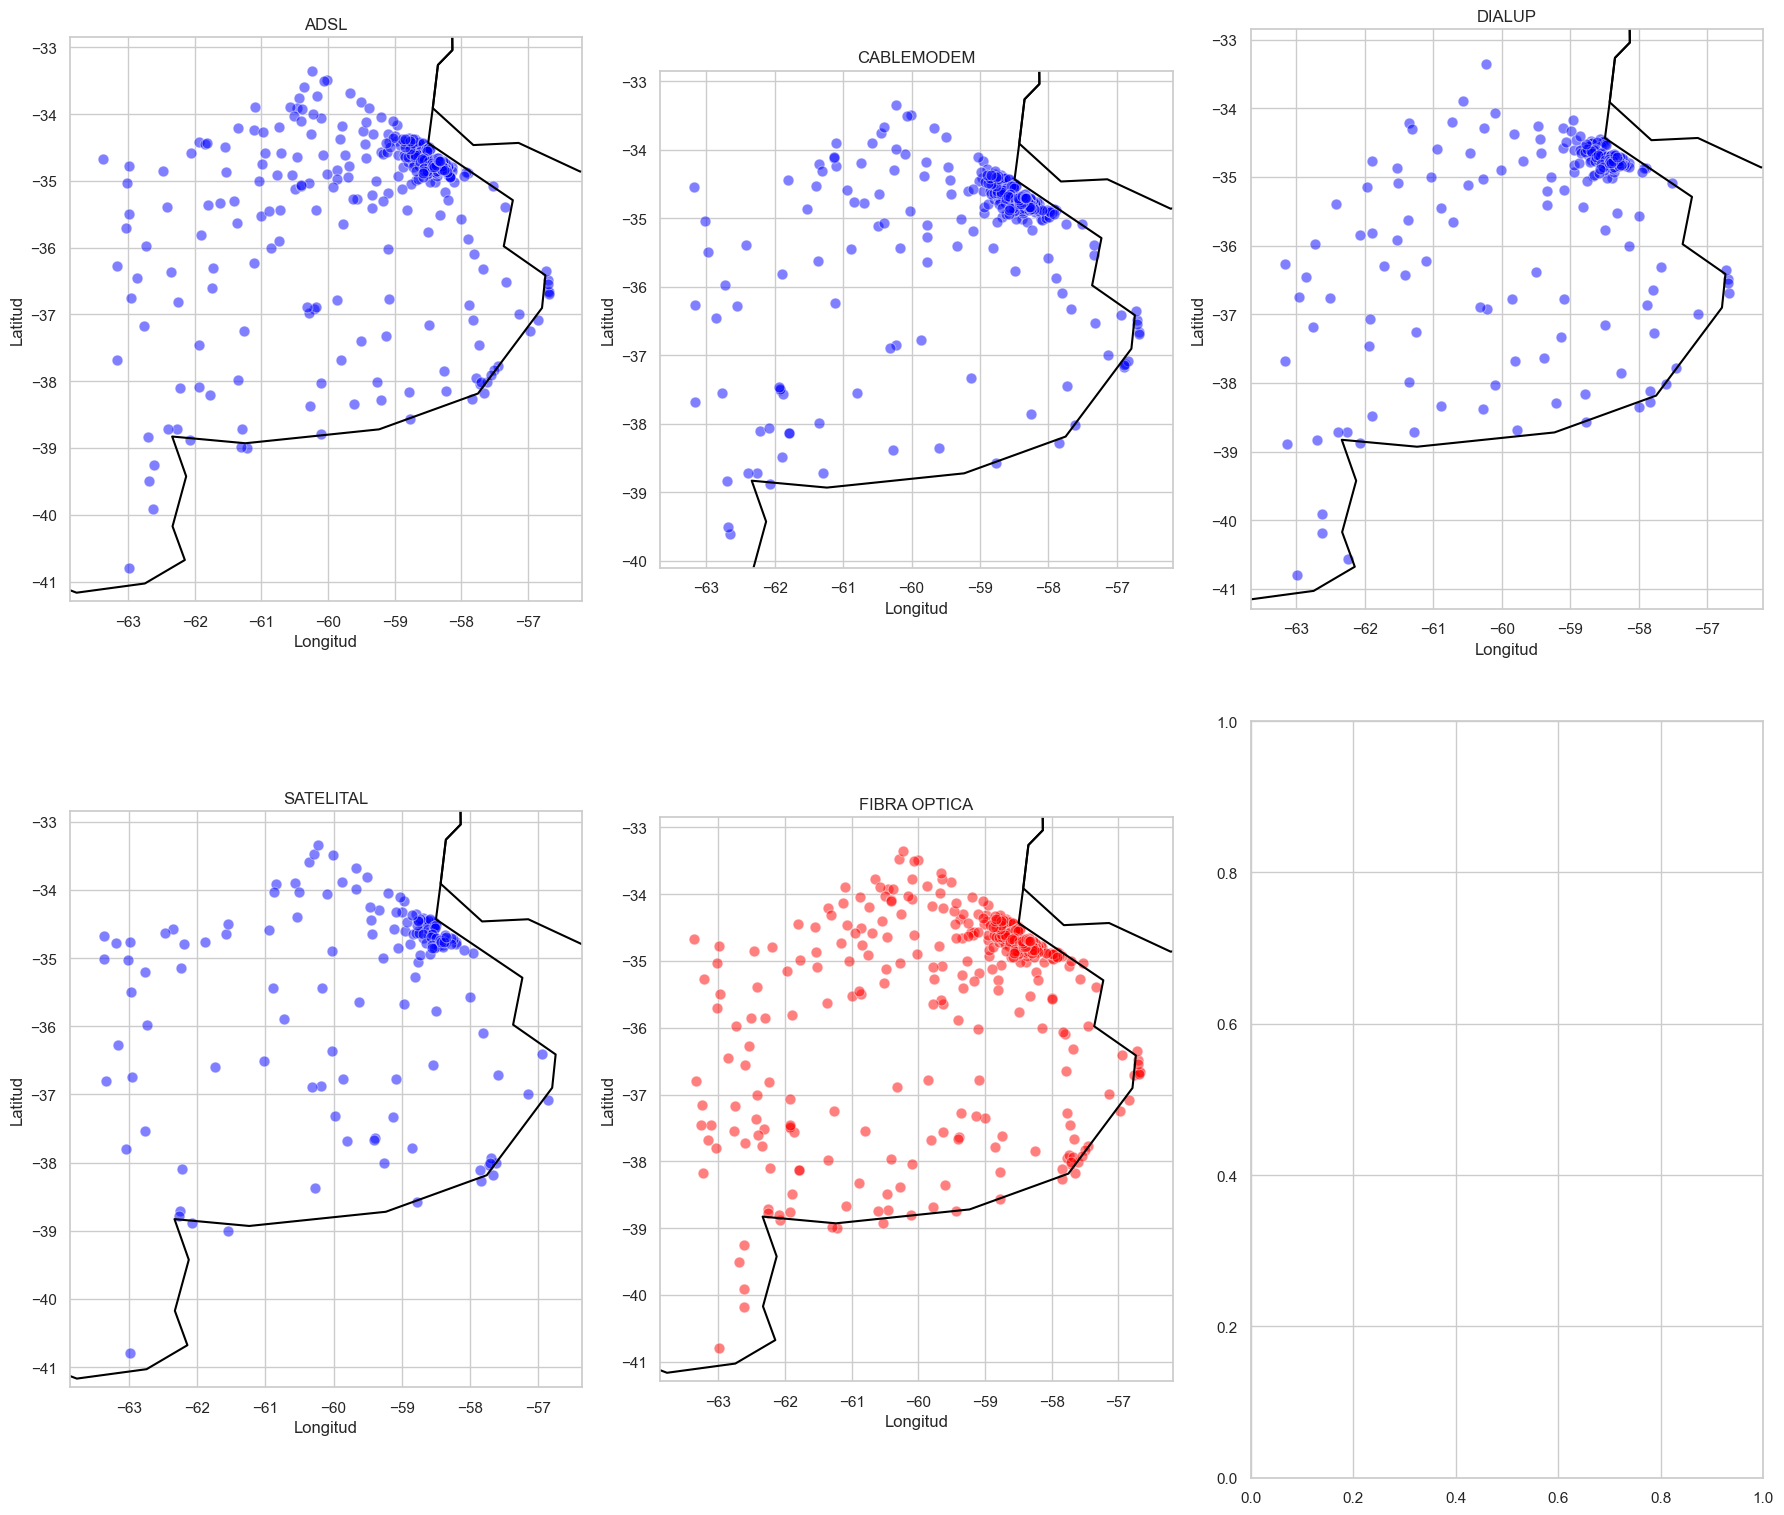

In [70]:
argentina = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

tecnologias_interes = ['ADSL', 'CABLEMODEM', 'DIALUP', 'SATELITAL', 'FIBRA OPTICA']

fig, axes = plt.subplots(2, 3, figsize=(18, 16))

for i, tecnologia in enumerate(tecnologias_interes):
    row = i // 3
    col = i % 3
    
    tecnologia_column = tecnologia.replace(" ", "")
    df_filtered = df[df[tecnologia_column] == 'SI']
    df_filtered = df_filtered[df_filtered['Provincia'].str.strip().isin(provincias_interes)]
    
    color = 'red' if tecnologia == 'FIBRA OPTICA' else 'blue'  # Color rojo para FIBRA OPTICA, azul para otras tecnologías
    
    geolocator = Nominatim(user_agent="my_app")
    location = geolocator.geocode("Argentina")
    center_lat = location.latitude
    center_lon = location.longitude
    
    ax = axes[row, col]
    ax.set_title(tecnologia)
    
    sns.scatterplot(data=df_filtered, x='Longitud', y='Latitud', color=color, ax=ax, s=60, alpha=0.5)
    
    argentina.boundary.plot(ax=ax, color='black')
    
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')
    ax.grid(True)
    
    buffer = 0.5
    ax.set_xlim(min(df_filtered['Longitud']) - buffer, max(df_filtered['Longitud']) + buffer)
    ax.set_ylim(min(df_filtered['Latitud']) - buffer, max(df_filtered['Latitud']) + buffer)


plt.tight_layout()
plt.show()


se realiza un analisis por tecnologia pero cabe mencionar que la tecnologia que tiene mayor zona de conectividad ADSL y fibra optica en contraste con el grafico de accesos a internet por tecnologia donde en primer lugar el acceso con mayor demanda es la de cable modem seguido por la fibra optica, el acceso mediante la tecnologia ADSL es minima a comparacion de las anteriormente dichas. es por ello que se realiza una comparacion de zonas de conectividad de las tecnologias a analizar vs la fibra optica que es la tecnologia a la que se porpone cambiar

se observa que las zonas con conectividad de las tecnologias para analizar estas dentro de la zona que existe la fibra optica, esto quiere decir que la infraestructura de fibra optica existe en las zonas con mayor demanda de internet, tambien se infiere que la tecnologia de fibra optica tiene mercado para seguir creciendo puesto que hay muy poco acceso a internet con la tecnologia de ADSL pero tiene gran medida una amplia zona con esta tecnologia, tambien en graficas anteriores se evidencia el uso preferente de velocidades mayores a 30 Mb que tiene una tendencia positiva que incremento a partir del 2017 en adelante siendo las velocidades con mayor demanda 

# Analizando los Ingresos en moneda nacional(Pesos Argentinos) y moneda extranjera (Dólar Americano) de los operadores por el servicio de Internet fijo

Se evalua el comportamiento de los ingresos de los diferentes operadores entre los años 2014 al 2022 para que de esta manera se tenga una referencia del rango de ganancia que podría tener la empresa al invertir en el mercado potencial.

In [71]:
df2=pd.read_excel("Ingresos trimestrales de los operadores por el servicio de Internet fijo.xlsx")

Se realiza un grafico para ver el comportamiento de los ingresos entre los años 2014 a 2022 

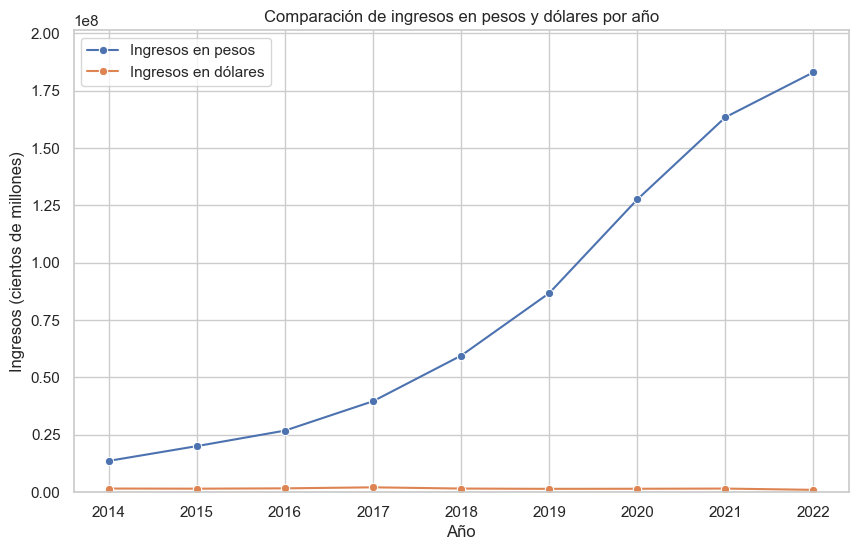

In [72]:
# Sumar los valores por año
df_sum = df2.groupby('Año').sum().reset_index()


plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# los ingresos en pesos
sns.lineplot(data=df_sum, x='Año', y='Ingresos (miles de pesos)', marker='o', label='Ingresos en pesos')

# los ingresos en dólares
sns.lineplot(data=df_sum, x='Año', y='ingresos (miles de dolares)', marker='o', label='Ingresos en dólares')


plt.ylim(0, df_sum['Ingresos (miles de pesos)'].max() * 1.1)  # Establece el rango deseado para el eje y


plt.xlabel('Año')
plt.ylabel('Ingresos (cientos de millones)')
plt.title('Comparación de ingresos en pesos y dólares por año')


plt.legend()
plt.show()

El análisis se centra en los años 2014 al 2022 y se analizara las moneda nacional para visualizar el comportamiento de el monto de ingresos, por ello se realiza una comparacion con la moneda extranjera.
al visualizar el gráfico puede observar claramente el incremente de la moneda nacional a lo largo de dichos años, al parecer los ingresos son muy altos lo cual cabe pensar que podría ser un mercado en crecimiento es por ello que cabe questionarse ¿si este incremento tan marcado se debe a otros motivos?.
Haciendo las conversiones a moneda extranjera a tipo de cambio del periodo se puede observar el real comportamiento de los ingresos de las compañías operadoras a lo largo de dichos años lo cual se concluye que  hay una constante en los ingresos durante dichos periodos de tiempo  

A raiz de la gráfica anterior se realiza un análisi de los ingresos de los operadores a lo largo del periodo de tiempo en la moneda extranjera

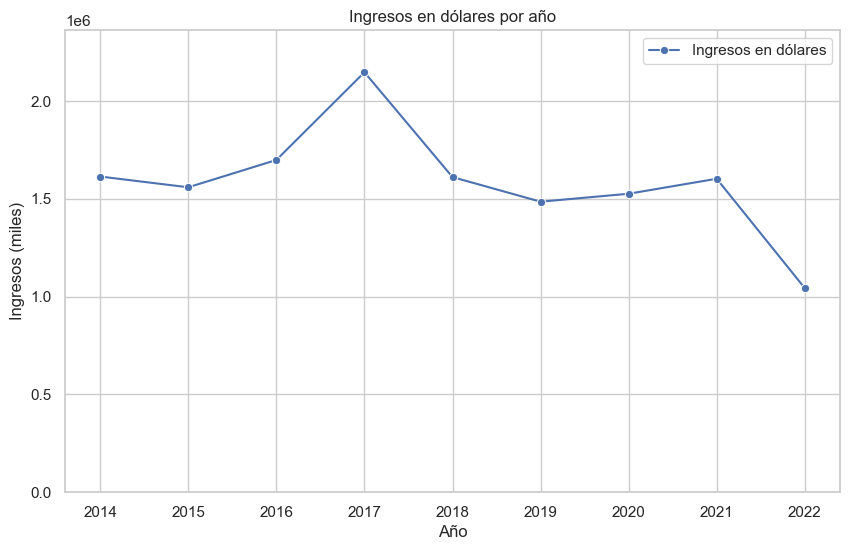

In [73]:
# Sumar los valores por año
df_sum = df2.groupby('Año').sum().reset_index()

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

# los ingresos en dólares
sns.lineplot(data=df_sum, x='Año', y='ingresos (miles de dolares)', marker='o', label='Ingresos en dólares')

plt.ylim(0, df_sum['ingresos (miles de dolares)'].max() * 1.1)  # Establece el rango deseado para el eje y

plt.xlabel('Año')
plt.ylabel('Ingresos (miles)')
plt.title('Ingresos en dólares por año')

plt.legend()
plt.show()

viendo la comparacion de los ingresos de los operadores a lo largo del tiempo se puede apreciar que es una constante si toma como referencia la modena extranjera (dólar americano) y mientras en la moneda nacional hay un incremento sustancial debido a la inflación que sufre el pais. Otro punto a considerar que en el año 2022 la cifra es engañosa puesto que solo se tiene 3 trimestres. Adicional a ello el pico que existe en el año 2017 (que coinside con el punto de quiebre que anteriormente hemos analizado en la tabla de el número de accesos por velocidad de descarga donde muestra la entrada de velocidades mayores a 30 mbps), los ingresos se mantienen dentro del mismo rango manteniendo el precio durante los años desde el 2014 y 2022

¿Dentro de que rangos estan los ingresos en dólares? ¿Cuáles son los ingresos mínimos y máximos por año?
Estas son algunas preguntas para tener una decisión de inversion es por ello que lo analizamos en los siguientes gráficos

In [74]:
ingresos_por_año = df2.groupby('Año')['ingresos (miles de dolares)'].agg(['min', 'max']).reset_index()

ingresos_por_año

,Año,min,max
0,2014,351893.16,465853.89
1,2015,364479.92,416813.88
2,2016,375274.65,473070.80
3,2017,470844.21,607474.40
4,2018,356370.64,450153.87
5,2019,345839.71,413644.55
6,2020,358122.65,401096.66
7,2021,359713.33,445938.48
8,2022,316950.78,382324.70


Se realiza un gráfico para analizar el comportamiento de los ingresos minimos y maximos por cada año del periodo.
Tener en consideración que para este análisis no se estan considerando los años 2017 por ser una año anómalo y puede darnos datos erróneos, y el año 2022 solo tiene informacion hasta el 3er trimestre. 

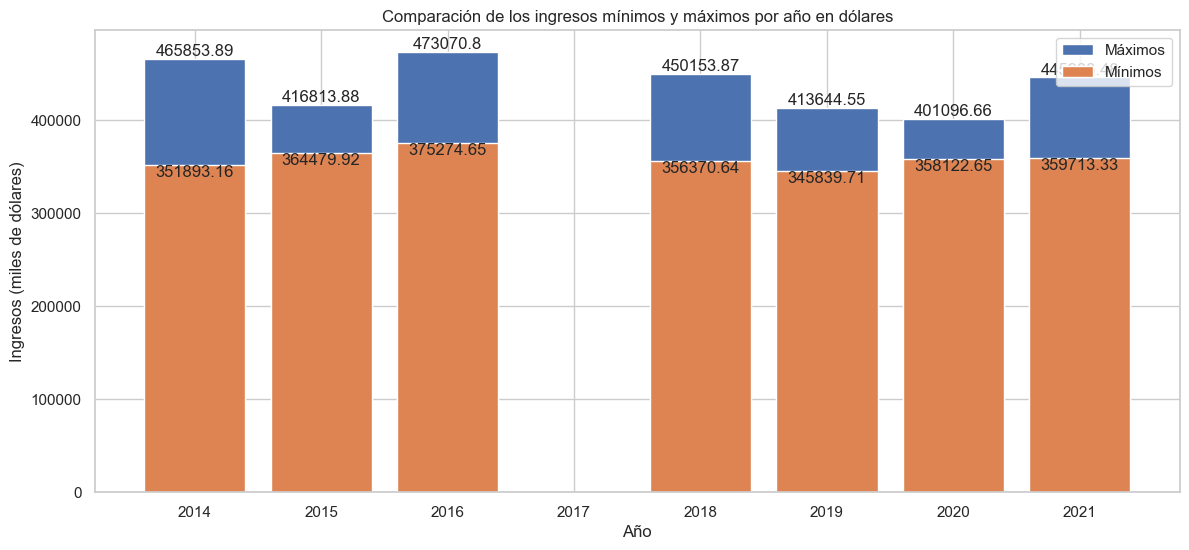

In [75]:
ingresos_por_año_filtrados = ingresos_por_año[(ingresos_por_año['Año'] != 2022) & (ingresos_por_año['Año'] != 2017)].reset_index(drop=True)

años = ingresos_por_año_filtrados['Año']
minimos = ingresos_por_año_filtrados['min']
maximos = ingresos_por_año_filtrados['max']

plt.figure(figsize=(14, 6))
plt.bar(años, maximos, label='Máximos')
plt.bar(años, minimos, label='Mínimos')

for i in range(len(años)):
    plt.text(años[i], maximos[i], str(maximos[i]), ha='center', va='bottom')
    plt.text(años[i], minimos[i], str(minimos[i]), ha='center', va='top')

plt.xlabel('Año')
plt.ylabel('Ingresos (miles de dólares)')
plt.title('Comparación de los ingresos mínimos y máximos por año en dólares')
plt.legend()

plt.show()




se analiza el promedio minimos y maximos de los ingresos totales para determinar en promedio cual es su rango

In [76]:
promedio_min = round(ingresos_por_año[(ingresos_por_año['Año'] != 2022) & (ingresos_por_año['Año'] != 2017)]["min"].mean(), 2)
promedio_max = round(ingresos_por_año[(ingresos_por_año['Año'] != 2022) & (ingresos_por_año['Año'] != 2017)]["max"].mean(), 2)

print(f"Promedio de ingresos mínimos entre los períodos 2014 a 2021 (excluyendo 2022 y 2017): ${promedio_min}")
print(f"Promedio de ingresos máximos entre los períodos 2014 a 2021 (excluyendo 2022 y 2017): ${promedio_max}")

Promedio de ingresos mínimos entre los períodos 2014 a 2021 (excluyendo 2022 y 2017): $358813.44
Promedio de ingresos máximos entre los períodos 2014 a 2021 (excluyendo 2022 y 2017): $438081.73
